<h1 align=center> EE679 Assignment1B </h1> 
<h2> <span style="float: left;"> Manas Vashistha </span> </h2> 
<h3> <span style="float: right;"> 28th September, 2020 </span> </h3> 
<br>

### 17D070064


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal
from scipy.io.wavfile import write
from IPython.display import Audio
pi = np.math.pi

In [2]:
def vowel_resonator(f0, f1, b1, fs, duration, input='impulse', x=None):
    r = np.exp(-b1*pi/fs)
    theta = 2*pi*f1/fs

    b = [1]
    a = [1, -2*r*np.cos(theta), r*r]

    time = np.arange(0, duration, 1/fs)
    y = np.zeros(len(time))
    if x is None:
        x = np.zeros(len(time))
        if input == 'impulse':
            for i in range(int(duration*f0)):
                x[i*int(np.floor(fs/f0))]=1
        elif input == 'triangular':

            values_x = [0, 0.5, 1, 0.5, 0]

            for i in range(int(duration*f0)):
                x[i*int(np.floor(fs/f0))]=values_x[0]
                x[i*int(np.floor(fs/f0))+1]=values_x[1]
                x[i*int(np.floor(fs/f0))+2]=values_x[2]
                x[i*int(np.floor(fs/f0))+3]=values_x[3]
                x[i*int(np.floor(fs/f0))+4]=values_x[4]  

    y[0] = x[0]
    y[1] = x[1] - a[1]*y[0]	
    for i in range(2, len(time)):
        y[i] = x[i] - a[1].real*y[i-1] - a[2].real*y[i-2]
 
    return time, x, y         

In [3]:
f0 = [120, 220]
vow_u = [300, 870, 2240]
B = 100
duration = 0.5
fs = 16000

In [4]:
nu1, xu1, tu1 = vowel_resonator(f0[0], vow_u[0], B, fs, duration, input='triangular')
_, _, tu2 = vowel_resonator(f0[0], vow_u[1], B, fs, duration, input='triangular', x=tu1)
_, _, yu1 = vowel_resonator(f0[0], vow_u[2], B, fs, duration, input='triangular', x=tu2)
yu1 = np.int16(yu1/np.max(np.abs(yu1))*32767)
write('part4u1.wav', fs, yu1)

In [5]:
Audio('part4u1.wav')

In [6]:
nu2, xu2, tu1 = vowel_resonator(f0[1], vow_u[0], B, fs, duration, input='triangular')
_, _, tu2 = vowel_resonator(f0[1], vow_u[1], B, fs, duration, input='triangular', x=tu1)
_, _, yu2 = vowel_resonator(f0[1], vow_u[2], B, fs, duration, input='triangular', x=tu2)
yu2 = np.int16(yu2/np.max(np.abs(yu2))*32767)
write('part4u2.wav', fs, yu2)

In [7]:
Audio('part4u2.wav')

In [8]:
def dft(vowel, fs, win_type, win_len):
    temp = int(win_len*fs)
    if win_type == 'hamming':
        w = vowel[:temp] * np.hamming(temp)
    elif win_type == 'rect':
        w = vowel[:temp] * np.ones(temp)
    
    f = np.abs(np.fft.fft(w, n=2048))
    t = np.fft.fftfreq(f.shape[0], 1 / fs)
    plt.rcParams["figure.figsize"] = [16, 4.8]
    return t, f

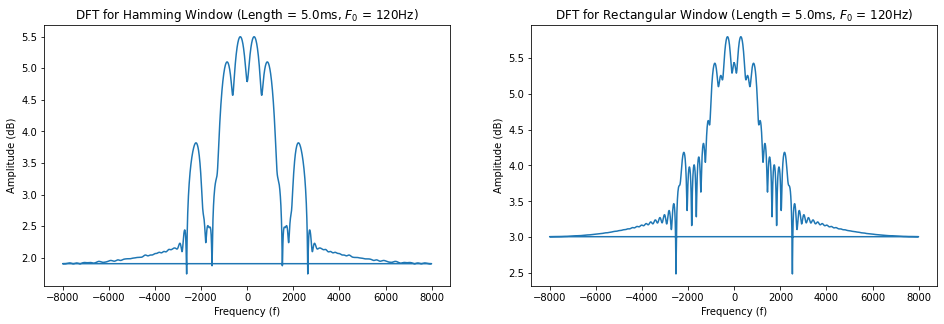

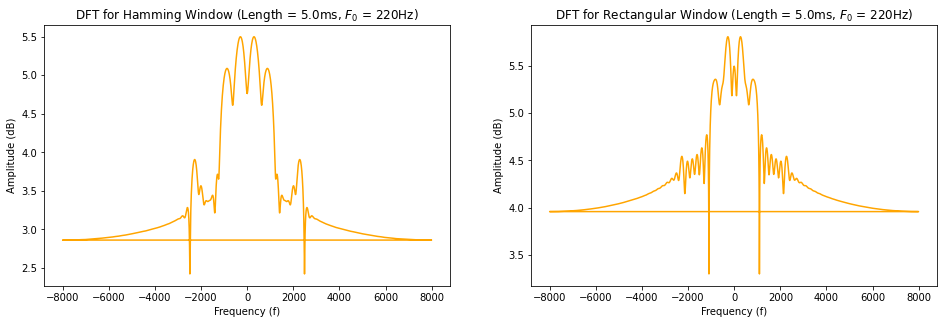

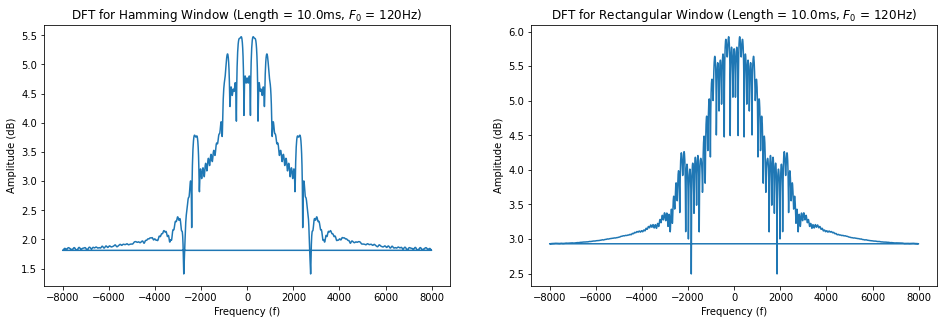

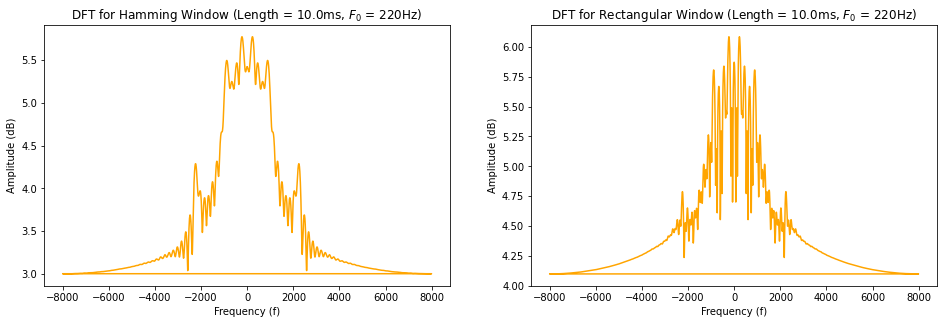

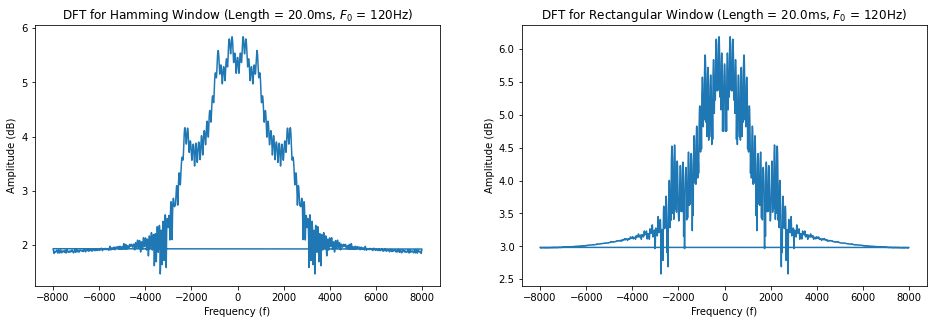

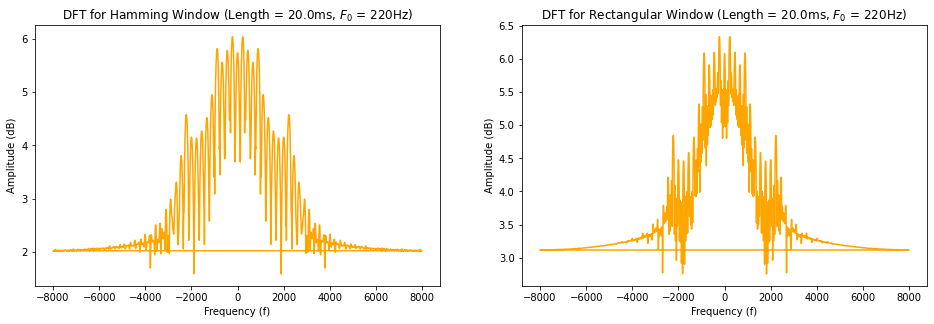

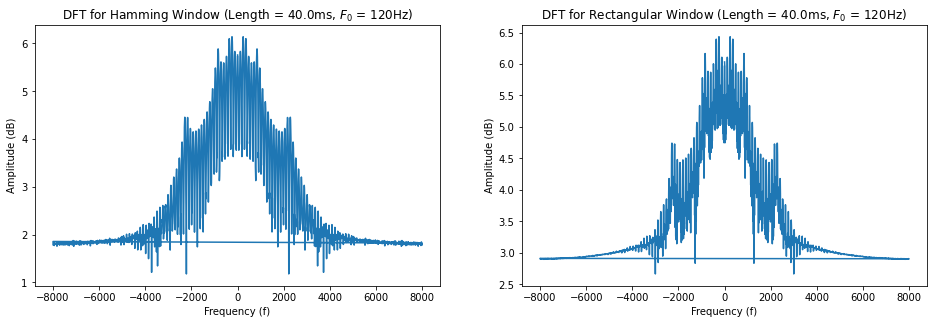

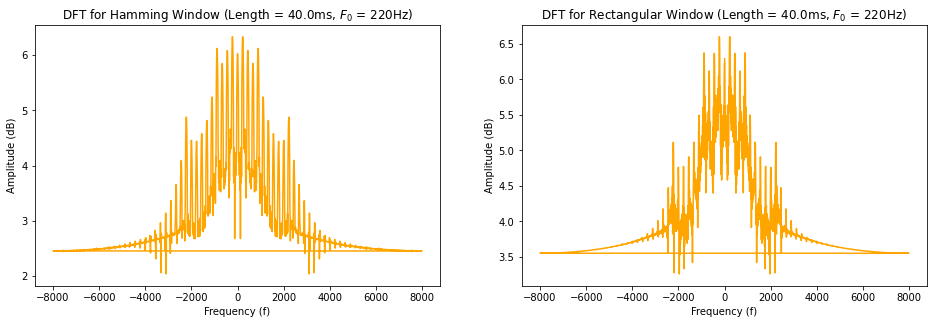

In [9]:
WINDOW_LENGTHS = [5/1000, 10/1000, 20/1000, 40/1000]
for l in WINDOW_LENGTHS:
    t_1h, f_1h = dft(yu1, fs, 'hamming', l)
    # print('DFT for Hamming Window (Length = {}ms, $F_0$ = 120Hz) : {}'.format(l*1e3, t_1h[np.argmax(f_1h)]))
    t_1r, f_1r = dft(yu1, fs, 'rect', l)
    # print('DFT for Rectangular Window (Length = {}ms, $F_0$ = 120Hz) : {}'.format(l*1e3, t_1r[np.argmax(f_1r)]))
    t_2h, f_2h = dft(yu2, fs, 'hamming', l)
    # print('DFT for Hamming Window (Length = {}ms, $F_0$ = 220Hz) : {}'.format(l*1e3, t_2h[np.argmax(f_2h)]))
    t_2r, f_2r = dft(yu2, fs, 'rect', l)
    # print('DFT for Rectangular Window (Length = {}ms, $F_0$ = 220Hz) : {}'.format(l*1e3, t_2r[np.argmax(f_2r)]))
    fig1, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(t_1h, np.log10(f_1h))
    ax1.set_title('DFT for Hamming Window (Length = {}ms, $F_0$ = 120Hz)'.format(l*1e3))
    ax1.set_xlabel('Frequency (f)')
    ax1.set_ylabel('Amplitude (dB)')
    ax1.axis('tight')
    ax2.plot(t_1r, np.log10(f_1r))
    ax2.set_title('DFT for Rectangular Window (Length = {}ms, $F_0$ = 120Hz)'.format(l*1e3))
    ax2.set_xlabel('Frequency (f)')
    ax2.set_ylabel('Amplitude (dB)')
    ax2.axis('tight')
    plt.show()
    fig2, (ax3, ax4) = plt.subplots(1, 2)
    ax3.plot(t_2h, np.log10(f_2h), 'orange')
    ax3.set_title('DFT for Hamming Window (Length = {}ms, $F_0$ = 220Hz)'.format(l*1e3))
    ax3.set_xlabel('Frequency (f)')
    ax3.set_ylabel('Amplitude (dB)')
    ax3.axis('tight')
    ax4.plot(t_2r, np.log10(f_2r), 'orange')
    ax4.set_title('DFT for Rectangular Window (Length = {}ms, $F_0$ = 220Hz)'.format(l*1e3))
    ax4.set_xlabel('Frequency (f)')
    ax4.set_ylabel('Amplitude (dB)')
    ax4.axis('tight')
    plt.show()

plt.rcParams["figure.figsize"] = [6.4, 4.8]

## Inferences from the plots 

- We can see as the window lenght increases the spectra gets more populated with other frequencies and gets more rough. It appears smoother for lower values of window length. This difference in roughness can be attributed to pitch of the sound which seem to be more preserved for larger window lengths.

- The spectra of the rectangular windows is smoother than that of the hamming windows. The width of individual peaks for rectangular windows is much less than that for hamming windows. This results in an increased accuracy for determination of peak values.

- As the $F_0$ is increased the peaks become more fine and hence, more precise. This makes the spectra for $F_0$ = 220 Hz smoother than the spectra for $F_0$ = 120Hz.

## Estimated values of the signal paramters from $F_0 = 120Hz$ plots 

|   Hamming Window  ||            |             |             |
|-------------------|-|------------|-------------|-------------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |
| 5                 |  200    |320     |      910      |      2230      |
| 10                |  130    |290     |      880      |      2300      |
| 20                |  130    |290     |      880      |      2300     |
| 40                |  140    |250     |      880      |      2300      |


<br>

|   Rectangular Window  ||            |             |             |
|-------------------|-|-----------|-------------|-------------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |
| 5                 |  170    |330     |      890      |      2200      |
| 10                |  110    |260     |      850      |     2200      |
| 20                |   110   |260     |      890      |      2200      |
| 40                |   140   |260     |      890      |      2310      |



<br>

## Estimated values of the signal paramters from $F_0 = 220Hz$ plots 

|   Hamming Window  ||            |             |             |
|-------------------|-|-----------|-------------|-------------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |
| 5                 |  250    |320     |      910      |      2300      |
| 10                |  170    |250     |      910      |      2260      |
| 20                |  210    |250     |      910      |      2230      |
| 40                |  210    |250     |      910      |      2230      |


<br>

|   Rectangular Window  ||            |             |             |
|-------------------|-|-----------|-------------|-------------|
| Window Length(ms) | $F_0$(Hz)|$F_1$(Hz)  | $F_2$(Hz)   | $F_3$(Hz)   |
| 5                 |  210    |300     |      850      |      2310      |
| 10                |  210    |260     |      920      |      2270      |
| 20                |  210    |260     |      920      |      2240      |
| 40                |   210   |260     |      920      |      2240      |



## Inferences from the reported values 

- The values of $F_0$ at lower window sizes appear to deviate a lot from the ground truth. This is justified as the spectra formed for lower window sizes are sparse and do not provide a god idea of the signalparameters.
- As the window size is increased we get a better approximation for the values of signal paramteres.
- When the window size is increased beyond a threshold the spectra becomes very clustered and we lose the important information. However, it still provides a better approximation to signal parameter values as compared to very low window sizes as it contains the information required to determine the parameters.
- The values obtained from Hamming window can be considered as better approximation to the signal paramter values.

- Looking at the values above, a good approximation to $F_0$ will be $F_0 = 120 Hz$ in first case and $F_0 = 210Hz$ in the second case.
- Similarly the guesses for $(F_1,\,F_2,\,F_3)$ will be (280Hz, 865Hz, 2250Hz) in the first case and (255Hz, 915Hz, 2235Hz) for the second case.